In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
import symbolic_transfer_entropy as ste
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
os.listdir('/home/pranavgoel/trans-fer-entropy/keyword_extraction')

['florida_url_to_dated_keywords.pkl',
 'california_url_to_dated_keywords.pkl',
 'illinois_url_to_dated_keywords.pkl',
 'texas_url_to_dated_keywords.pkl',
 'extract_and_save_keywords_for_all_articles.ipynb',
 'newyork_url_to_dated_keywords.pkl',
 'ohio_url_to_dated_keywords.pkl',
 'README.md',
 'nytimes_foxnews_url_to_dated_keywords.pkl',
 '.ipynb_checkpoints']

In [48]:
data_path = '/home/pranavgoel/trans-fer-entropy/keyword_extraction'

In [49]:
with open(data_path+'/'+'florida_url_to_dated_keywords.pkl', 'rb') as flpkl:
    fl = pickle.load(flpkl)

In [50]:
fl_dates = [datetime.strptime(v[0], '%Y-%m-%d %H:%M:%S') for v in fl.values()]

In [51]:
# Convert the list of datetime values to a pandas Series
datetime_series = pd.to_datetime(fl_dates)

# Create a time series of counts using pandas
count_series = datetime_series.value_counts().sort_index()

# You can also resample the time series to fill missing gaps if necessary
# For example, resample to hourly counts:
count_series = count_series.resample('D').count().fillna(0)

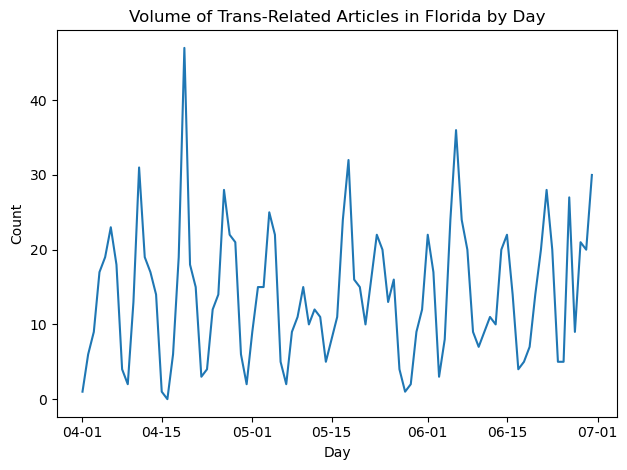

In [57]:
fig, ax = plt.subplots()
ax.plot(count_series)

date_format = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)

plt.title('Volume of Trans-Related Articles in Florida by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('/home/sagar/trans-fer-entropy/plots_and_images/fl_article_volume.pdf')

In [58]:
with open(data_path+'/'+'nytimes_foxnews_url_to_dated_keywords.pkl', 'rb') as nytfoxpkl:
    nytfox = pickle.load(nytfoxpkl)

In [59]:
nytfox_dates = [datetime.strptime(v[0], '%Y-%m-%d %H:%M:%S') for v in nytfox.values()]

In [60]:
# Convert the list of datetime values to a pandas Series
nytfox_series = pd.to_datetime(nytfox_dates)

# Create a time series of counts using pandas
nytfox_counts = nytfox_series.value_counts().sort_index()

# You can also resample the time series to fill missing gaps if necessary
# For example, resample to hourly counts:
nytfox_counts = nytfox_counts.resample('D').count().fillna(0)

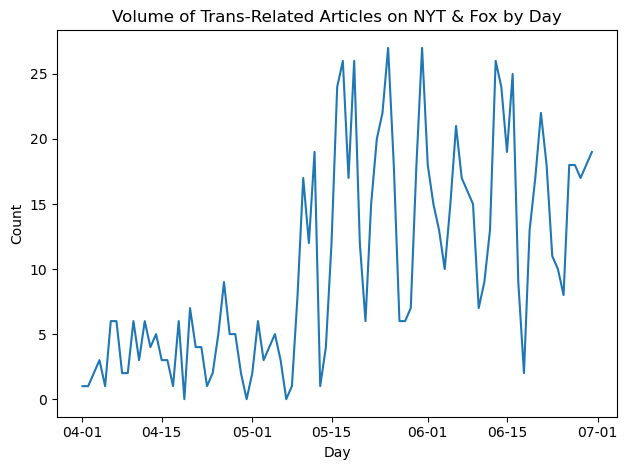

In [61]:
fig, ax = plt.subplots()
ax.plot(nytfox_counts)

date_format = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)

plt.title('Volume of Trans-Related Articles on NYT & Fox by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('/home/sagar/trans-fer-entropy/plots_and_images/nytfox_article_volume.pdf')

In [62]:
len(list(count_series.values)), len(list(count_series.values))

(91, 91)

In [42]:
nytfox_to_fl_te_1d_4w = symbolic_transfer_entropy_again(list(count_series.values), list(nytfox_counts.values), w=4, s=1)
print(nytfox_to_fl_te_1d_4w)

0.6770455884898198


In [43]:
fl_to_nytfox_te_1d_4w = symbolic_transfer_entropy_again(list(nytfox_counts.values),list(count_series.values), w=4, s=1)
print(fl_to_nytfox_te_1d_4w)

0.8679345589507922


In [46]:
nytfox_to_fl_te_3d_4w = symbolic_transfer_entropy_again(list(count_series.values), list(nytfox_counts.values), w=4, s=3)
print(nytfox_to_fl_te_3d_4w)

0.5629072918469556


In [47]:
fl_to_nytfox_te_3d_4w = symbolic_transfer_entropy_again(list(nytfox_counts.values),list(count_series.values), w=4, s=3)
print(fl_to_nytfox_te_3d_4w)

0.16666666666666666


In [2]:
list(range(1,3))

[1, 2]